In [82]:
import matplotlib.pyplot as plt
import numpy as np

In [83]:
mlp_data = np.load("./baselineMLP/3-fold-mlp-evaluation_data.npy")
mlp_data

array([[1.31342780e-01, 6.86384643e-01, 2.77889437e-01, 1.77405220e-02,
        1.25080547e-02, 5.23670970e-04, 3.33741442e-02, 2.75893859e-02],
       [1.40364146e-01, 6.76459266e-01, 2.87669198e-01, 1.82958865e-02,
        1.31528304e-02, 5.31886524e-04, 3.98270480e-02, 4.89273733e-02],
       [1.33606628e-01, 6.88242283e-01, 2.78335853e-01, 1.81867185e-02,
        1.24112112e-02, 5.28557249e-04, 4.40659783e-02, 2.11029930e-02]])

In [84]:
stp_data = np.load("./baselineSTP-GSR/stp-eval-data.npy")
stp_data



array([[0.14391134, 0.57680536, 0.30221855, 0.02123724, 0.01325698,
        0.00057728, 0.03485008, 0.02270463],
       [0.15150733, 0.55863536, 0.31702695, 0.02116838, 0.01388485,
        0.00059228, 0.0606706 , 0.03679453],
       [0.15261393, 0.54051232, 0.31381843, 0.02084524, 0.01449858,
        0.00061564, 0.05527331, 0.03709277]])

In [ ]:
pf_data = np.load("./graphFDE/pf-eval-data.npy")
pf_data

array([[1.31874800e-01, 6.65532470e-01, 2.90757360e-01, 1.98768067e-02,
        1.28613190e-02, 5.55380111e-04, 4.04001077e-02, 3.00016279e-02],
       [1.41420588e-01, 6.37013100e-01, 2.97968800e-01, 2.03328653e-02,
        1.33118246e-02, 5.66425896e-04, 6.32228288e-02, 4.05713626e-02],
       [1.32597893e-01, 6.72523800e-01, 2.84200970e-01, 1.97737648e-02,
        1.19441767e-02, 5.35184726e-04, 4.57558673e-02, 2.84232354e-02]])

In [86]:
## move MAE (PC) to be the final label
def aug_for_pc(data):
    for fold in data:
        # pc_index = 5
        temp_pc = fold[5]
        fold[5:7] = fold[6:8]
        fold[7] = temp_pc
    return data
    
mlp_data = aug_for_pc(mlp_data)
stp_data = aug_for_pc(stp_data)
pf_data = aug_for_pc(pf_data)


In [87]:
# Number of categories
categories = ["MAE", "PCC", "JSD", "MAE (BC)", "MAE (EC)", "AE (ASP)", "AE (AC)", "MAE (PC)"]
colors = ["orange", "purple", "violet", "pink", "brown", "cyan"]
# "red", "blue", "green", 
x = np.arange(len(categories))
slice1 = slice(0, 3)
slice2 = slice(3, 7)
slice3 = slice(7, 8)
# Plot individual bar graphs for each tuple

labels = ["MLP baseline", "STP-GSR baseline", "GraphFDE"]

def plot_row(datas, axes, row, width = 0.25):
    axes[row, 0].bar(x[slice1] - width, datas[0][row][slice1], width, color=colors[0], label = labels[0])
    axes[row, 0].bar(x[slice1], datas[1][row][slice1], width, color=colors[1], label = labels[1])
    axes[row, 0].bar(x[slice1] + width, datas[2][row][slice1], width, color=colors[2], label = labels[2])
    axes[row, 0].set_title(f"Fold {row + 1} - MAE, PCC, JSD")
    axes[row, 0].set_xticks(x[slice1])
    axes[row, 0].set_xticklabels(categories[slice1], rotation=45)
    axes[row, 0].legend()


    axes[row, 1].bar(x[slice2] - width, datas[0][row][slice2], width, color=colors[0], label = labels[0])
    axes[row, 1].bar(x[slice2], datas[1][row][slice2], width, color=colors[1], label = labels[1])
    axes[row, 1].bar(x[slice2] + width, datas[2][row][slice2], width, color=colors[2], label = labels[2])
    axes[row, 1].set_title(f"Fold {row + 1} - MAE (BC), MAE (EC), AE (ASP), AE (AC)")
    axes[row, 1].set_xticks(x[slice2])
    axes[row, 1].set_xticklabels(categories[slice2], rotation=45)
    axes[row, 1].legend(loc = "upper left")

    axes[row, 2].bar(x[slice3] - width, datas[0][row][slice3], width, color=colors[0], label = labels[0])
    axes[row, 2].bar(x[slice3], datas[1][row][slice3], width, color=colors[1], label = labels[1])
    axes[row, 2].bar(x[slice3] + width, datas[2][row][slice3], width, color=colors[2], label = labels[2])
    axes[row, 2].set_title(f"Fold {row + 1} - MAE (PC)")
    axes[row, 2].set_xticks(x[slice3])
    axes[row, 2].set_xticklabels(categories[slice3], rotation=45)
    axes[row, 2].legend(loc = "lower left")

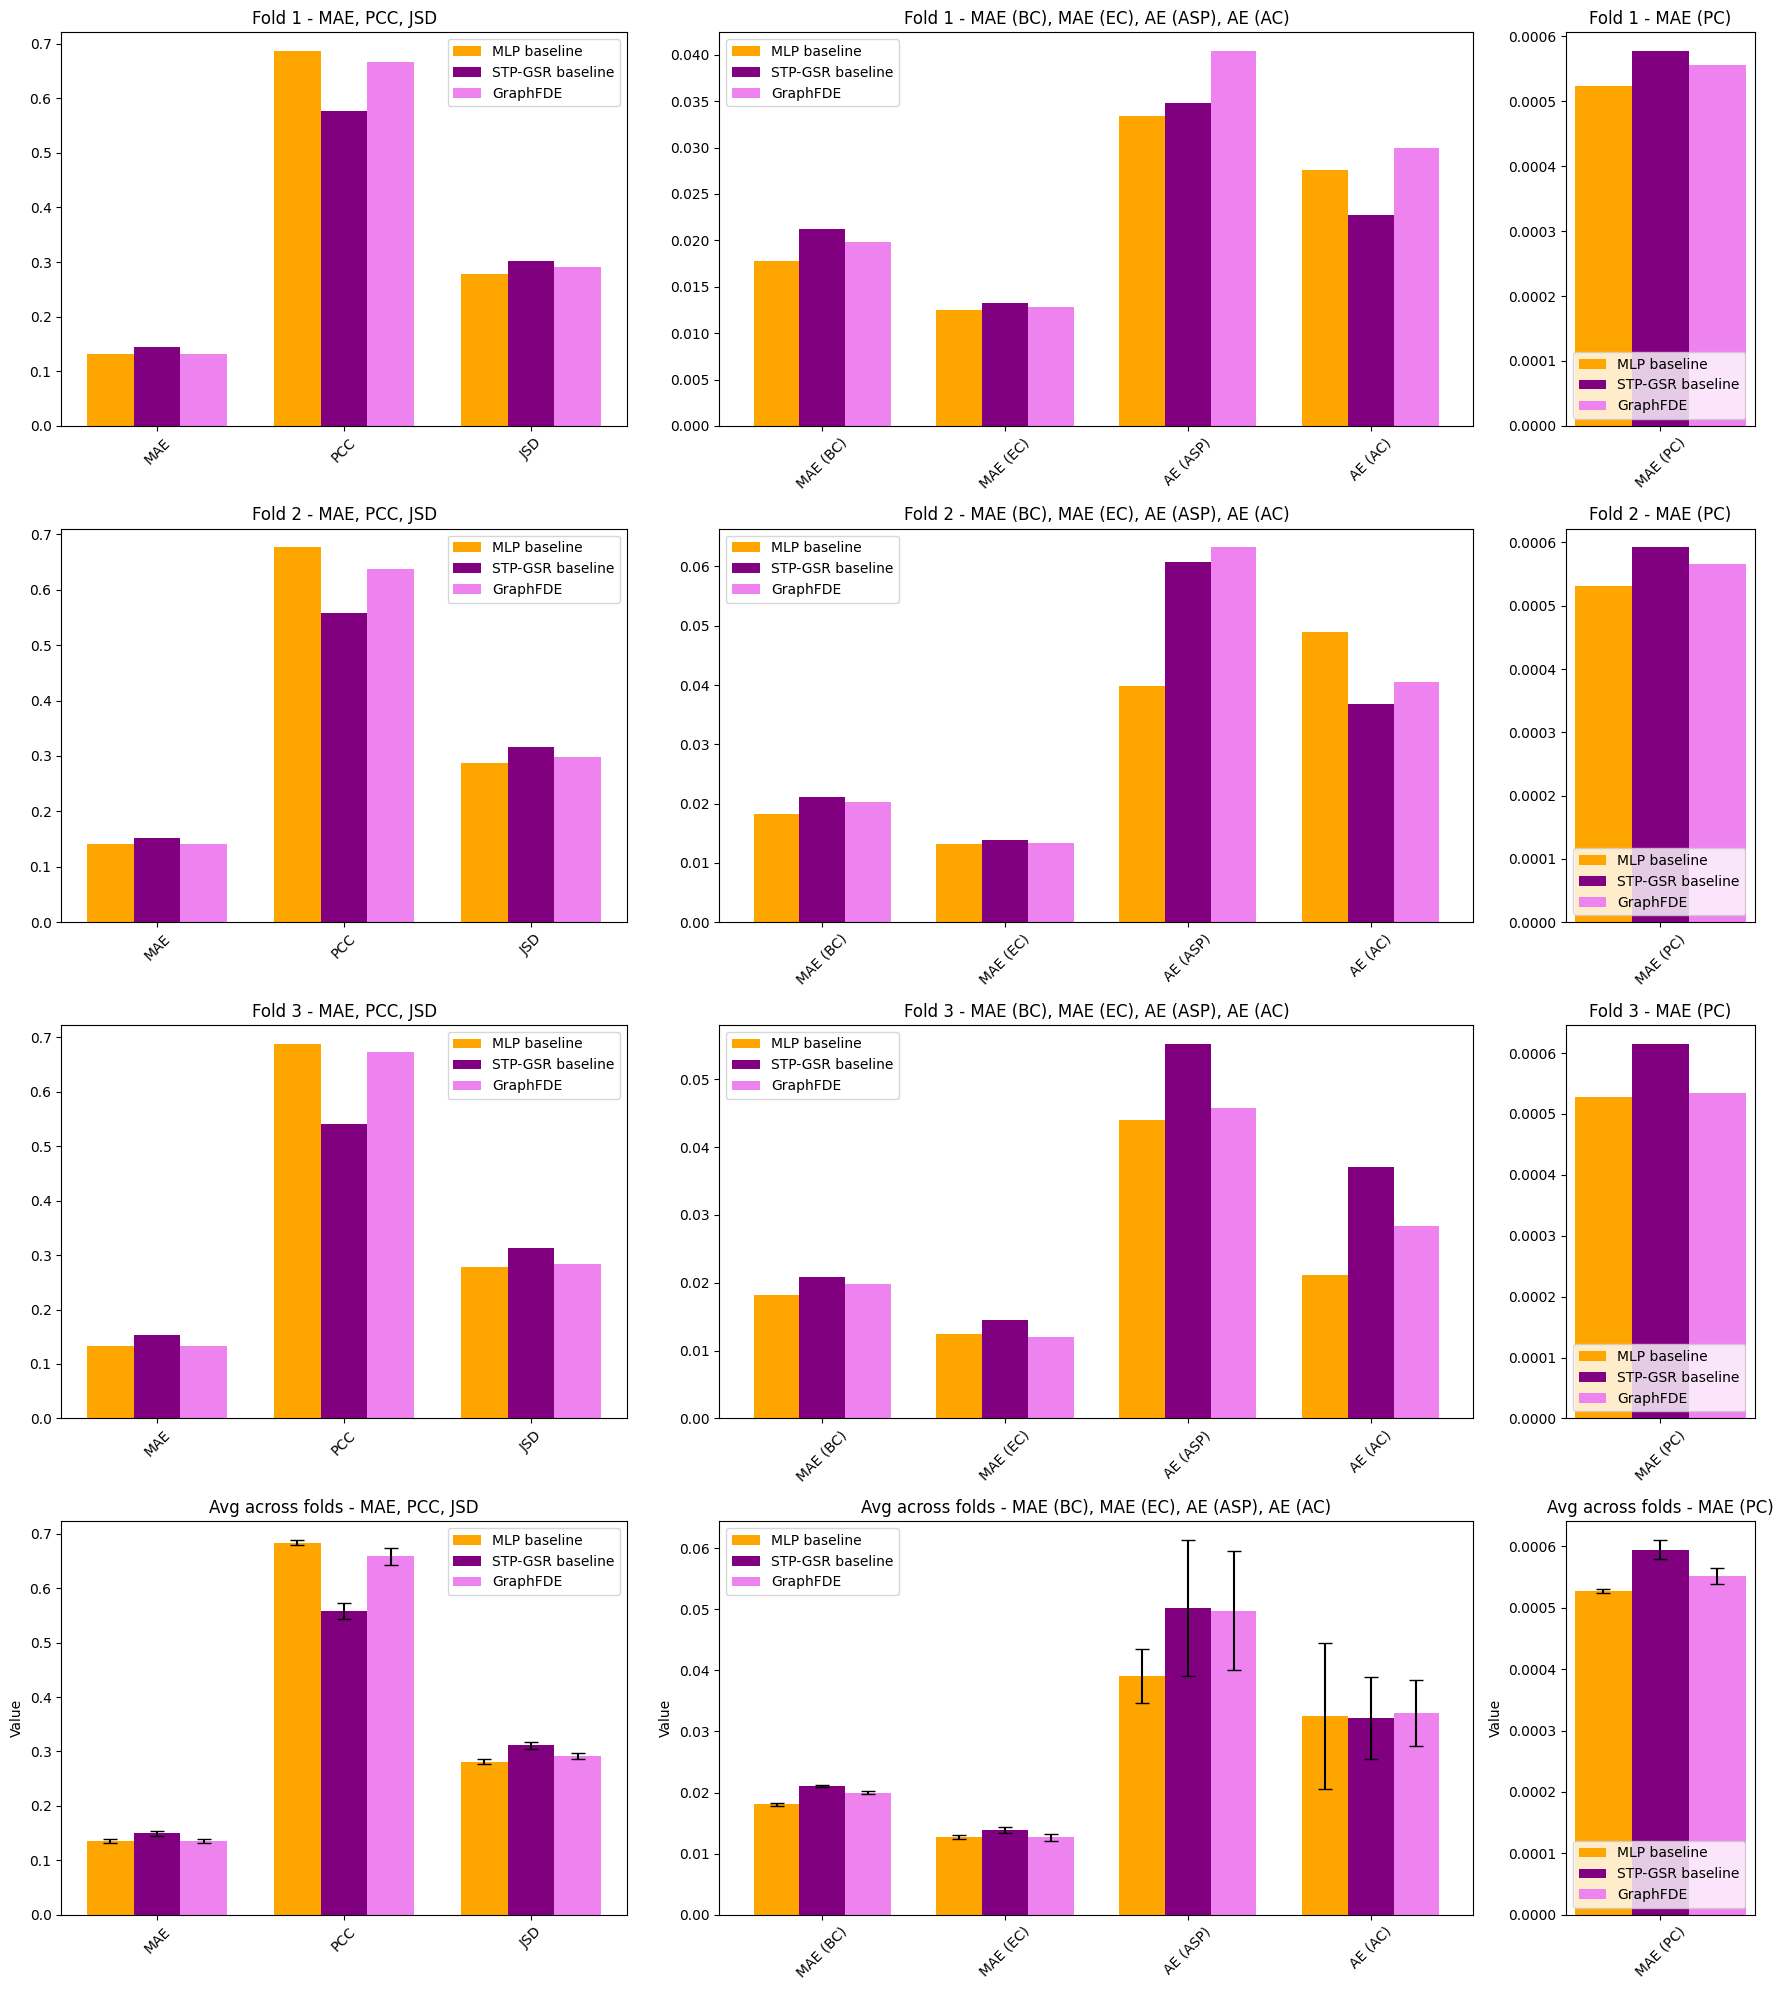

In [89]:

# Number of categories
categories = ["MAE", "PCC", "JSD", "MAE (BC)", "MAE (EC)", "AE (ASP)", "AE (AC)", "MAE (PC)"]
colors = ["orange", "purple", "violet", "pink", "brown", "cyan"]
# "red", "blue", "green", 
x = np.arange(len(categories))
slice1 = slice(0, 3)
slice2 = slice(3, 7)
slice3 = slice(7, 8)
# Plot individual bar graphs for each tuple
fig, axes = plt.subplots(4, 3, figsize=(18, 20), gridspec_kw={"width_ratios": [3, 4, 1]})
width = 0.25
labels = ["MLP baseline", "STP-GSR baseline", "GraphFDE"]
datas = [mlp_data, stp_data, pf_data]

plot_row(datas, axes, row = 0)
plot_row(datas, axes, row = 1)
plot_row(datas, axes, row = 2)

# Compute the average and standard deviation across the three tuples for each category
mean_mlp = np.mean(mlp_data, axis=0)
mean_stp = np.mean(stp_data, axis=0)
mean_pf = np.mean(pf_data, axis=0)

std_mlp = np.std(mlp_data, axis=0)
std_stp = np.std(stp_data, axis=0)
std_pf = np.std(pf_data, axis=0)


# Plot the average bar graph with error bars for the standard deviation
axes[3, 0].bar(x[slice1] - width, mean_mlp[slice1],yerr = std_mlp[slice1], capsize=5, width = width, color=colors[0], label = labels[0])
axes[3, 0].bar(x[slice1], mean_stp[slice1], yerr = std_stp[slice1],capsize=5, width = width, color=colors[1], label = labels[1])
axes[3, 0].bar(x[slice1] + width, mean_pf[slice1], yerr = std_pf[slice1],capsize=5, width =width, color=colors[2], label = labels[2])
axes[3, 0].set_title("Avg across folds - MAE, PCC, JSD")
axes[3, 0].set_xticks(x[slice1])
axes[3, 0].set_xticklabels(categories[slice1], rotation=45)
axes[3, 0].set_ylabel("Value")
axes[3, 0].legend()

axes[3, 1].bar(x[slice2] - width, mean_mlp[slice2],yerr = std_mlp[slice2], capsize=5, width = width, color=colors[0], label = labels[0])
axes[3, 1].bar(x[slice2], mean_stp[slice2], yerr = std_stp[slice2],capsize=5, width = width, color=colors[1], label = labels[1])
axes[3, 1].bar(x[slice2] + width, mean_pf[slice2], yerr = std_pf[slice2],capsize=5, width =width, color=colors[2], label = labels[2])
axes[3, 1].set_title("Avg across folds - MAE (BC), MAE (EC), AE (ASP), AE (AC)")
axes[3, 1].set_xticks(x[slice2])
axes[3, 1].set_xticklabels(categories[slice2], rotation=45)
axes[3, 1].set_ylabel("Value")
axes[3, 1].legend()

axes[3, 2].bar(x[slice3] - width, mean_mlp[slice3],yerr = std_mlp[slice3], capsize=5, width = width, color=colors[0], label = labels[0])
axes[3, 2].bar(x[slice3], mean_stp[slice3], yerr = std_stp[slice3],capsize=5, width = width, color=colors[1], label = labels[1])
axes[3, 2].bar(x[slice3] + width, mean_pf[slice3], yerr = std_pf[slice3],capsize=5, width =width, color=colors[2], label = labels[2])
axes[3, 2].set_title("Avg across folds - MAE (PC)")
axes[3, 2].set_xticks(x[slice3])
axes[3, 2].set_xticklabels(categories[slice3], rotation=45)
axes[3, 2].set_ylabel("Value")
axes[3, 2].legend()

plt.tight_layout()
plt.show()